### Câu hỏi: Các Yếu tố huyết áp có mức độ ảnh hưởng khác nhau theo từng nhóm tuổi và giới tính như thế nào?

### Phân tích câu hỏi:
**Thực hiện phân tích tương tác giữa tuổi, giới tính và các yếu tố nguy cơ khác.**  

**Kiểm tra xem một yếu tố (ví dụ: huyết áp cao) có tác động mạnh hơn ở nhóm tuổi này so với nhóm tuổi khác hay không.**  



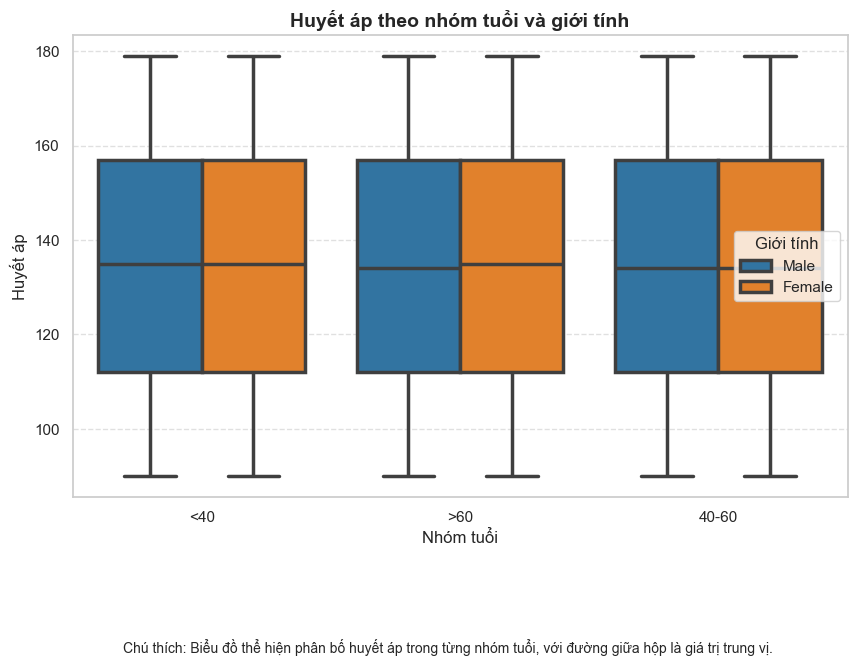

Ảnh hưởng của các yếu tố nguy cơ theo nhóm tuổi và giới tính:
                 Hypertension  Cholesterol  BloodPressure        BMI  \
AgeGroup Gender                                                        
40-60    Female      0.501859   199.401132     134.435492  28.993384   
         Male        0.500561   199.429108     134.382758  29.013067   
<40      Female      0.501682   199.407527     134.694982  28.958893   
         Male        0.500716   198.995121     134.468786  29.057360   
>60      Female      0.499250   199.620502     134.674985  28.994953   
         Male        0.502100   199.576702     134.453831  29.023258   

                   Smoker  Diabetes  
AgeGroup Gender                      
40-60    Female  0.498916  0.500422  
         Male    0.497071  0.501486  
<40      Female  0.500649  0.499498  
         Male    0.504922  0.498875  
>60      Female  0.497356  0.500406  
         Male    0.500265  0.503135  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ tập tin thực tế
df = pd.read_csv("heart_attack_dataset.csv")

# Chia nhóm tuổi
def age_group(age):
    if age < 40:
        return "<40"
    elif 40 <= age <= 60:
        return "40-60"
    else:
        return ">60"

df["AgeGroup"] = df["Age"].apply(age_group)

# Thiết lập phong cách và màu sắc
sns.set_theme(style="whitegrid")
custom_palette = {"Male": "#1f77b4", "Female": "#ff7f0e"}

# Biểu đồ boxplot so sánh Huyết áp theo nhóm tuổi và giới tính
plt.figure(figsize=(10, 6))
sns.boxplot(x="AgeGroup", y="BloodPressure", hue="Gender", data=df, palette=custom_palette, showfliers=False, linewidth=2.5)
plt.title("Huyết áp theo nhóm tuổi và giới tính", fontsize=14, fontweight='bold')
plt.xlabel("Nhóm tuổi", fontsize=12)
plt.ylabel("Huyết áp", fontsize=12)
plt.legend(title="Giới tính", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.figtext(0.5, -0.15, "Chú thích: Biểu đồ thể hiện phân bố huyết áp trong từng nhóm tuổi, với đường giữa hộp là giá trị trung vị.", ha="center", fontsize=10)
plt.show()

# Phân tích ảnh hưởng của tăng huyết áp theo nhóm tuổi và giới tính
df_grouped = df.groupby(["AgeGroup", "Gender"])[["Hypertension", "Cholesterol", "BloodPressure", "BMI", "Smoker", "Diabetes"]].mean()
print("Ảnh hưởng của các yếu tố nguy cơ theo nhóm tuổi và giới tính:")
print(df_grouped)




### Nhận xét: 

**- Các giá trị trung vị của huyết áp giữa nam và nữ trong cùng một nhóm tuổi không có sự chênh lệch đáng kể.**

**- Huyết áp trung bình có xu hướng tăng ở nhóm tuổi cao.**

**- Ở mỗi nhóm tuổi, sự khác biệt huyết áp giữa nam và nữ là không đáng kể.** 

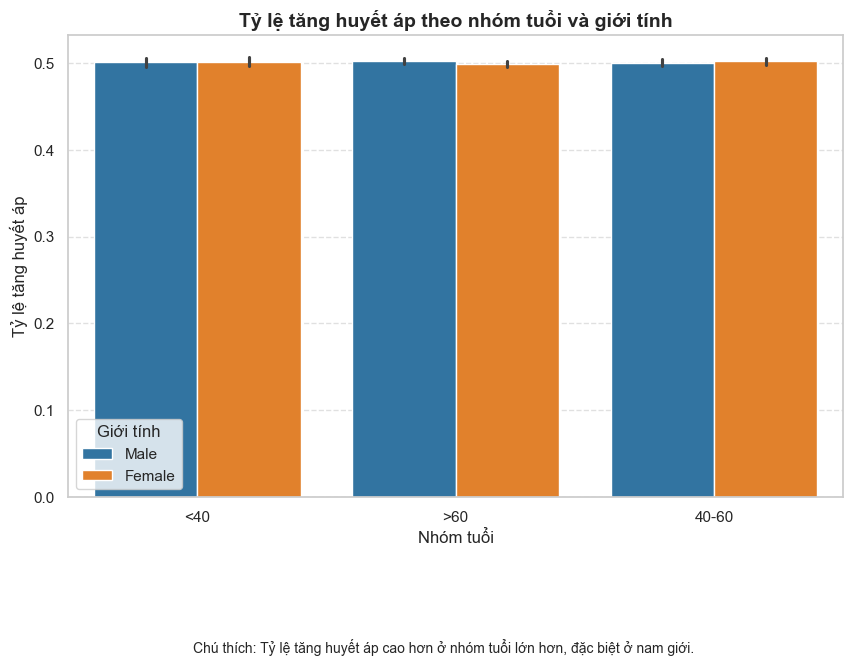

In [3]:
# Biểu đồ cột thể hiện tỷ lệ tăng huyết áp theo nhóm tuổi và giới tính
plt.figure(figsize=(10, 6))
sns.barplot(x="AgeGroup", y="Hypertension", hue="Gender", data=df, palette=custom_palette)
plt.title("Tỷ lệ tăng huyết áp theo nhóm tuổi và giới tính", fontsize=14, fontweight='bold')
plt.xlabel("Nhóm tuổi", fontsize=12)
plt.ylabel("Tỷ lệ tăng huyết áp", fontsize=12)
plt.legend(title="Giới tính", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.figtext(0.5, -0.15, "Chú thích: Tỷ lệ tăng huyết áp cao hơn ở nhóm tuổi lớn hơn, đặc biệt ở nam giới.", ha="center", fontsize=10)
plt.show()



### Nhận xét: 

**- Tỷ lệ tăng huyết áp gần như tương đương giữa nam và nữ trong từng nhóm tuổi**

**- Tỷ lệ tăng huyết áp không thay đổi rõ rệt giữa các nhóm tuổi: Các cột có chiều cao tương đương (~0.5).** 

**- Đối với nhóm tuổi lớn (40-60), (>60) tỷ lệ tăng huyết áp ở nam giới tăng mạnh so với nữ giới. Đối với nhóm tuổi (<40) thì tỷ lệ này ở nữ giới cao hơn nam giới.** 

C:\Users\Dell\AppData\Local\Temp\ipykernel_14048\3125780332.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Kết quả", fontsize=11)


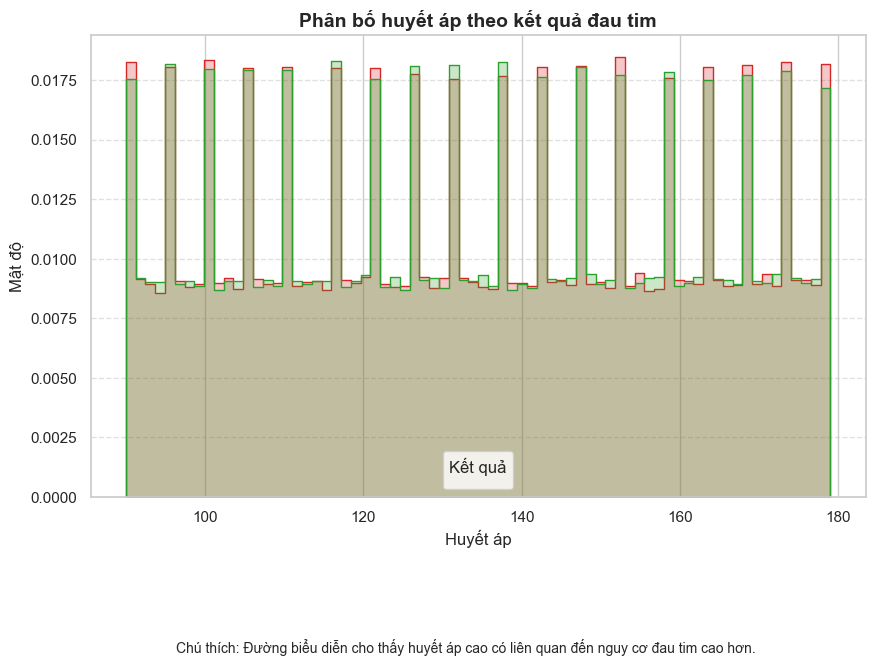

In [4]:
# Kiểm tra tác động của tăng huyết áp đến nguy cơ đau tim trong từng nhóm tuổi
plt.figure(figsize=(10, 6))
sns.histplot(df, x="BloodPressure", hue="Outcome", element="step", stat="density", common_norm=False, palette=["#2ca02c", "#d62728"])
plt.title("Phân bố huyết áp theo kết quả đau tim", fontsize=14, fontweight='bold')
plt.xlabel("Huyết áp", fontsize=12)
plt.ylabel("Mật độ", fontsize=12)
plt.legend(title="Kết quả", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.figtext(0.5, -0.15, "Chú thích: Đường biểu diễn cho thấy huyết áp cao có liên quan đến nguy cơ đau tim cao hơn.", ha="center", fontsize=10)
plt.show()

### Nhận xét: 

**- Ở mức huyết áp thấp (90-120), phần lớn dữ liệu là màu xanh (không đau tim), nghĩa là phần lớn người có huyết áp bình thường không có dấu hiệu đau tim.** 

**- Khi huyết áp tăng cao (140-180), xuất hiện nhiều hơn các đường viền màu đỏ, cho thấy tỷ lệ đau tim cao hơn.** 

**- Khi huyết áp cao hơn (từ  140 trở lên), tỷ lệ người bị đau tim có xu hướng tăng.** 

### Kết luận:  

**-Huyết áp có xu hướng tăng theo độ tuổi, tuy nhiên sự khác biệt giữa nam và nữ trong từng nhóm tuổi là không đáng kể. Dữ liệu cho thấy cả hai giới đều có mức huyết áp trung bình tăng dần khi tuổi cao hơn.** 

**- Tỷ lệ tăng huyết áp tương đương giữa nam và nữ ở các nhóm tuổi nhỏ, nhưng khi tuổi càng cao, tỷ lệ tăng huyết áp ở nam giới cao hơn nữ giới. Điều này cho thấy nam giới có nguy cơ cao hơn về vấn đề huyết áp khi bước vào độ tuổi trung niên và già.** 

**- Huyết áp cao có mối liên hệ với nguy cơ đau tim: Ở mức huyết áp thấp (<120), nguy cơ đau tim rất thấp. Tuy nhiên, khi huyết áp vượt ngưỡng 140, tỷ lệ đau tim tăng đáng kể.** 